# Obesity Classification

## Dataset

### Columns
- **ID**: Integer (Unique)
- **Age**: Integer
- **Gender**: String/Categorical (Male/Female)
- **Height**: Integer (cm)
- **Weight**: Integer (kg)
- **BMI**: Float
- **Label**: String/Categorical (e.g., Under Weight, Normal Weight, Overweight, Obese)

### Data Size
- **Total Columns**: 7
- **Total Entries**: 108

### Data Description
- **Source**: [Obesity Classification Dataset](https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset)
- **Collection Method**: The specific method of data collection is not provided in the dataset description. It is recommended to review the dataset documentation on Kaggle for more details.
- **Time Period**: The dataset does not specify a particular time frame for data collection.
- **Licence**: Attribution 4.0 International (CC BY 4.0) -For more info please check Kaggle-
- **Usability**: Scored 10.00 on Kaggle.

### Data Quality
- **Missing Values**: There is no missing values!


## Machine Learning Algorithms

### Selected Algorithms
For this project, several algorithms were chosen to evaluate performance based on the dataset’s characteristics, size, and complexity:

- **Linear SVC**: A linear support vector classifier, effective for linearly separable data. Chosen for its speed and efficiency in binary or multiclass classification with simpler decision boundaries.

- **KNeighbors Classifier**: A non-parametric, instance-based algorithm that classifies data based on the nearest neighbors. Ideal for smaller datasets, as it captures local data patterns well.

- **Random Forest Classifier (Ensemble Method)**: An ensemble-based model that builds multiple decision trees and averages them to improve robustness and accuracy. Effective for capturing complex, non-linear relationships and reducing overfitting.

- **HistGradientBoosting Classifier**: A gradient boosting algorithm that builds trees sequentially, focusing on correcting previous errors. Works well with small to medium datasets, often outperforming traditional Random Forests by capturing subtler patterns.

For more info please visit: [Scikit Learn Choosing the Right Estimator](https://scikit-learn.org/1.3/tutorial/machine_learning_map/)


In [1]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Analyzing

In [2]:
# Turning .csv data to Pandas DataFrame
df = pd.read_csv("../data/obesity-classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [4]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [5]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [6]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [7]:
# Min and Max Height
min(df.Height), max(df.Height)

(120, 210)

In [8]:
# Min and Max Weight
min(df.Weight), max(df.Weight)

(10, 120)

In [9]:
# Min and Max Age
min(df.Age), max(df.Age)

(11, 112)

In [10]:
# Min and Max BMI
min(df.BMI), max(df.BMI)

(3.9, 37.2)

### Descriptive Statistics

In [11]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [12]:
# Getting descriptive statistics for numerical columns
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [13]:
# Checking missing values
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

### Categorical Data Distribution

In [14]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [15]:
gender_counts = df["Gender"].value_counts()
gender_counts

Gender
Male      56
Female    52
Name: count, dtype: int64

In [16]:
label_counts = df["Label"].value_counts()
label_counts

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

#### Crosstab Correlation

In [17]:
# Comparing target columns with gender column
pd.crosstab(df["Label"], df["Gender"])

Gender,Female,Male
Label,,
Normal Weight,12,17
Obese,0,12
Overweight,8,12
Underweight,32,15


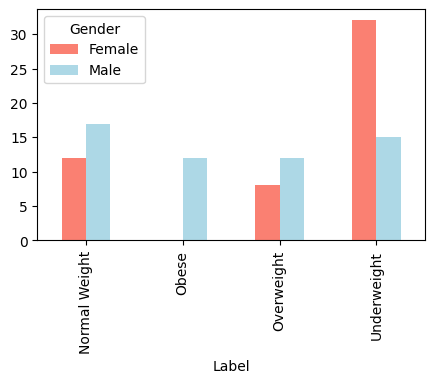

In [18]:
# Creating a plot of crosstab
pd.crosstab(df["Label"], df["Gender"]).plot(kind="bar", figsize=(5, 3), color=["salmon", "lightblue"]);

## Visualization

### Distribution Plots

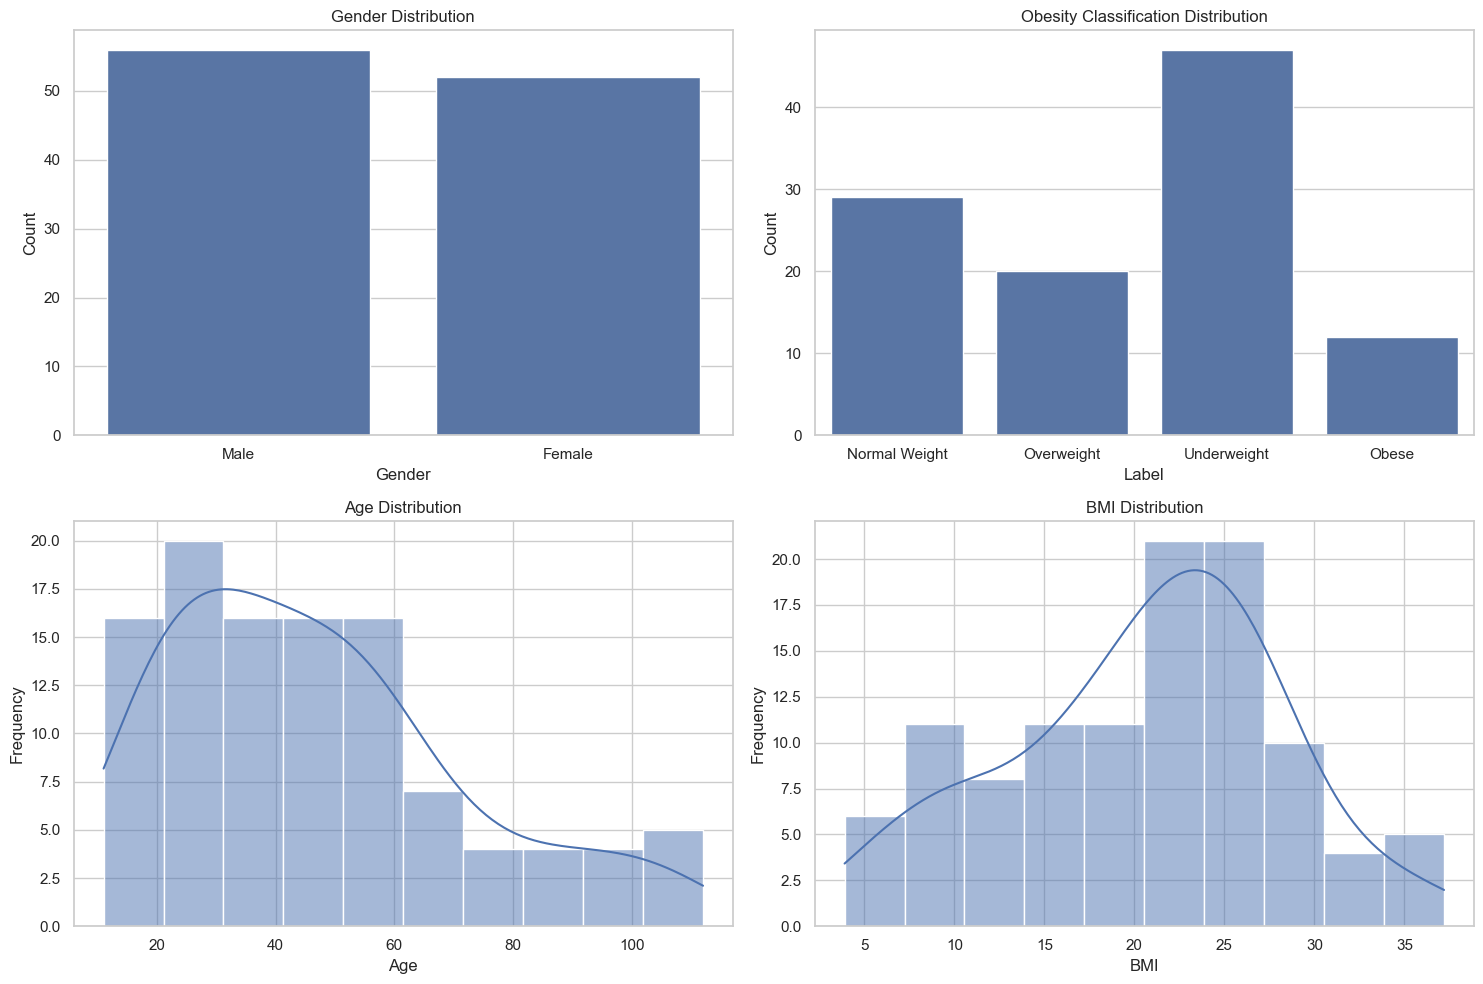

In [19]:
# Setting up style for Seaborn
sns.set(style="whitegrid")

# Creating a figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Plotting the Gender distribution
sns.countplot(x='Gender', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# Plotting the Label distribution
sns.countplot(x='Label', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Obesity Classification Distribution')
axs[0, 1].set_xlabel('Label')
axs[0, 1].set_ylabel('Count')

# Plotting the Age distribution
sns.histplot(df['Age'], bins=10, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Frequency')

# Plotting the BMI distribution
sns.histplot(df['BMI'], bins=10, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('BMI Distribution')
axs[1, 1].set_xlabel('BMI')
axs[1, 1].set_ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()

# Saving the figure to /images folder
plt.savefig("../images/distribution_plot.png")

# Showing the plot
plt.show()

### Age vs Height for obesity

In [20]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


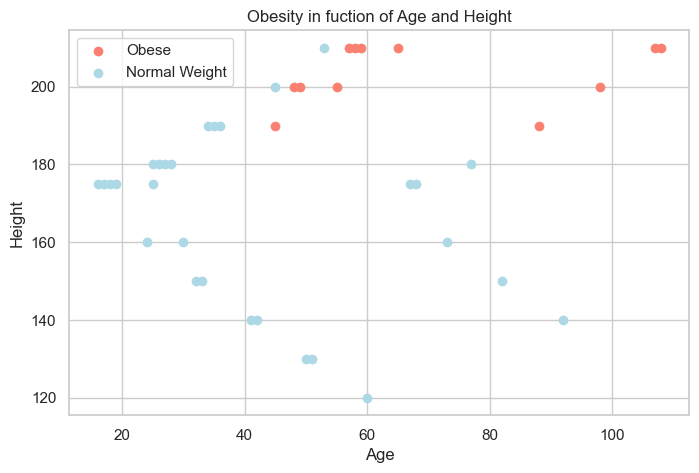

In [21]:
# Creating figure
plt.figure(figsize=(8, 5))

# Scatter for obese
plt.scatter(df.Age[df.Label == "Obese"],
            df.Height[df.Label == "Obese"],
            c="salmon")

# Scatter for normal weight
plt.scatter(df.Age[df.Label == "Normal Weight"],
            df.Height[df.Label == "Normal Weight"],
            c="lightblue")

# Adding helpful information
plt.title("Obesity in fuction of Age and Height")
plt.xlabel("Age")
plt.ylabel("Height")
plt.legend(["Obese", "Normal Weight"]);

### Correlation Matrix

In [22]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
corr_matrix

,ID,Age,Height,Weight,BMI
ID,1.000000,-0.298257,-0.008224,-0.572625,-0.615235
Age,-0.298257,1.000000,-0.076896,0.465106,0.474185
Height,-0.008224,-0.076896,1.000000,0.428890,0.354340
Weight,-0.572625,0.465106,0.428890,1.000000,0.972829
BMI,-0.615235,0.474185,0.354340,0.972829,1.000000


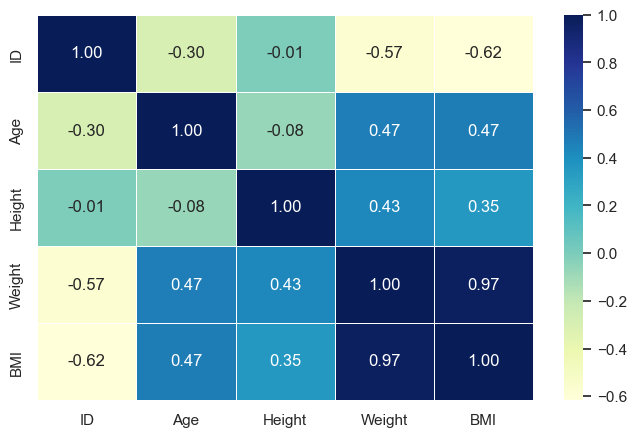

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## Getting the Data Ready

In this section I will try to make the data ready to feed an algorithm. First approach will be to seperate data into `X` and `y` labels.

We need to get rid of `ID` and `Label` columns for `X`.
We need `Label` column to create `y`.

Then, I will look at `get_dummies()` to make sure my all data is numerical...

**Creating X and y**

In [24]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [25]:
# Creating X label
X = df.drop(columns=["ID", "Label"])
X.head()

,Age,Gender,Height,Weight,BMI
0,25,Male,175,80,25.3
1,30,Female,160,60,22.5
2,35,Male,180,90,27.3
3,40,Female,150,50,20.0
4,45,Male,190,100,31.2


In [26]:
# Creating y label
y = df["Label"]
y.head()

0    Normal Weight
1    Normal Weight
2       Overweight
3      Underweight
4            Obese
Name: Label, dtype: object

**Encoding categorical data**

In [27]:
# Encoding X
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Encoding y
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
y = l_encoder.fit_transform(y)

In [28]:
X.head()

,Age,Height,Weight,BMI,Gender_Male
0,25,175,80,25.3,True
1,30,160,60,22.5,False
2,35,180,90,27.3,True
3,40,150,50,20.0,False
4,45,190,100,31.2,True


In [29]:
y[:10]

array([0, 0, 2, 3, 1, 3, 1, 3, 1, 3])

**Train and Test Split**

We will use `train_test_split()` from `sklearn.model_selection` to split our data into train and test sets.
`train_test_split()` helps prevent overfitting by ensuring the model is evaluated on data it hasn’t seen during training, and it shuffles the data.

We will split our dataframe to train and test sets:
* We will get %80 of `X` as `X_train` and remaining as `X_test`.
* We will get %80 of `y` as `y_train` and remaning as `y_test`.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
len(X_train), len(X_test), len(y_train), len(y_test)

(86, 22, 86, 22)

In [32]:
X_train.head()

,Age,Height,Weight,BMI,Gender_Male
17,53,130,40,16.7,False
23,83,150,50,20.0,False
72,35,190,65,22.7,True
80,24,180,45,18.7,True
15,43,140,50,20.0,False


Now our data is ready to be fit into a machine learning model!

## Choosing the Model

We have split our data into X and y. Then, we encoded our, and finally we splitted our data to train and test sets.

Now, it is time to feed our models by one by.

**Section Overview**:
- Try to eliminate models which are under performing.
- We first evaluate the model with basic `score()` method!

### LinearSVC

In [33]:
# Importing our model
from sklearn.svm import LinearSVC

# Creating an instance of the model
svc_model = LinearSVC()

# Training the model
svc_model.fit(X_train, y_train)

# Scoring the model
svc_model.score(X_test, y_test)

0.8636363636363636

In [34]:
svc_y_preds = svc_model.predict(X_test)
svc_y_preds[:5]

array([2, 3, 0, 1, 3])

### KNeighbors Classifier

In [35]:
# Importing our model
from sklearn.neighbors import KNeighborsClassifier

# Creating an instance of the model
neigh = KNeighborsClassifier()

# Training the model
neigh.fit(X_train, y_train)

# Scoring the model
neigh.score(X_test, y_test)

0.7727272727272727

In [36]:
neigh_y_preds = neigh.predict(X_test)
neigh_y_preds[:5]

array([2, 3, 0, 2, 3])

In [37]:
neigh_y_proba = neigh.predict_proba(X_test)
neigh_y_proba[:5]

array([[0. , 0.2, 0.8, 0. ],
       [0. , 0. , 0. , 1. ],
       [0.8, 0. , 0.2, 0. ],
       [0.2, 0. , 0.8, 0. ],
       [0.4, 0. , 0. , 0.6]])

### Random Forest Classifier

In [38]:
# Importing our model
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the model
clf = RandomForestClassifier()

# Training the model
clf.fit(X_train, y_train)

# Scoring the model
clf.score(X_test, y_test)

1.0

In [39]:
clf_y_preds = clf.predict(X_test)
clf_y_preds[:5]

array([2, 3, 0, 2, 3])

In [40]:
clf_y_proba = clf.predict_proba(X_test)
clf_y_proba[:5]

array([[0.03, 0.03, 0.94, 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.96, 0.  , 0.04, 0.  ],
       [0.02, 0.22, 0.76, 0.  ],
       [0.01, 0.02, 0.01, 0.96]])

### Hist Gradient Boosting Classifier

In [41]:
# Importing our model
from sklearn.ensemble import HistGradientBoostingClassifier

# Creating an instance of the model
hclf = HistGradientBoostingClassifier()

# Training the model
hclf.fit(X_train, y_train)

# Scoring the model
hclf.score(X_test, y_test)

0.9545454545454546

In [42]:
hclf_y_preds = hclf.predict(X_test)
hclf_y_preds[:5]

array([2, 3, 0, 2, 3])

In [43]:
hclf_y_proba = hclf.predict_proba(X_test)
hclf_y_proba[:5]

array([[2.25531556e-03, 1.03669015e-01, 8.93935397e-01, 1.40272833e-04],
       [8.59545297e-06, 3.05454747e-08, 1.76284332e-08, 9.99991356e-01],
       [9.91623971e-01, 6.55916013e-06, 8.36572533e-03, 3.74452141e-06],
       [4.25149836e-04, 1.51716319e-02, 9.84370844e-01, 3.23742126e-05],
       [8.10801113e-07, 1.88676774e-06, 1.52321726e-05, 9.99982070e-01]])

**Final Decision**:
- We will eliminate - LinearSVC and KNeighbour Classifier -
- We see that these to gets the worst score among others!

## Evaluating the Models

We are gone use scikit learn evaluation functions to determine the score of models before processing any further!

Some of the functions we're going to use are:
- Accuracy, f1 score, confusion matrix, precision score, recall score
- We will do cross-validation afterwards to be sure the score we get is not luck!

First I will create a helper function to evaluate our model and return the results!

In [44]:
# Imports for evaluation functions
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [45]:
# Creating the helper function called `evaluate()`
def evaluate(y_true, y_score):
    # Going thorugh evaluation functions and assign them to variables
    acc = accuracy_score(y_true, y_score)
    f1 = f1_score(y_true, y_score, average='weighted')
    prec = precision_score(y_true, y_score, average='weighted')
    recall = recall_score(y_true, y_score, average='weighted')

    # Creating a dictionary which holds the name of the func and the value we got from the func
    eval_dict = {
        "Accuracy": f"{acc:.2f}",
        "F1 Score": f"{f1:.2f}",
        "Precision": f"{prec:.2f}",
        "Recall": f"{recall:.2f}",
    }

    # Returning the dictionary
    return eval_dict

In [46]:
# Creating the helper cross validating func called `evaluate_cv()`
def evaluate_cv(model, X, y, cv=5):
    # cross validation our model with different `scoring` parameters
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    f1 = cross_val_score(model, X, y, cv=cv, scoring="f1_weighted")
    prec = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(precision_score, average="weighted", zero_division=1))
    recall = cross_val_score(model, X, y, cv=cv, scoring="recall_weighted")

    # Creating a dictionary which holds the name of the `scoring` parameter and the value we got from the func
    eval_cv_dict = {
        "Accuracy": f"{acc.mean():.2f}",
        "F1 Score": f"{f1.mean():.2f}",
        "Precision": f"{prec.mean():.2f}",
        "Recall": f"{recall.mean():.2f}",
    }

    # Returning the dictionary
    return eval_cv_dict

**Evaluating Random Forest Classifier Estimator**

In [47]:
y_test[:3], clf_y_preds[:3]

(array([2, 3, 0]), array([2, 3, 0]))

In [48]:
# Let's start with confusion matrix
confusion_matrix(y_test, clf_y_preds)

array([[6, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 7]])

In [49]:
# Now it is time to give our function a go
clf_eval = evaluate(y_test, clf_y_preds)
clf_eval

{'Accuracy': '1.00', 'F1 Score': '1.00', 'Precision': '1.00', 'Recall': '1.00'}

In [50]:
# Cross validating our Random Forest Classifier Estimator
clf_cross_val = evaluate_cv(clf, X, y)
clf_cross_val

{'Accuracy': '0.97', 'F1 Score': '0.97', 'Precision': '0.99', 'Recall': '0.97'}

**Improvement**: We create a Pandas DataFrame to compare normal evaluating vs cross validation evaluating

In [51]:
clf_compare = pd.DataFrame(data=[clf_eval, clf_cross_val], index=["Random Forest Classifier", "Random Forest Classifier (CV)"])
clf_compare

,Accuracy,F1 Score,Precision,Recall
Random Forest Classifier,1.00,1.00,1.00,1.00
Random Forest Classifier (CV),0.97,0.97,0.99,0.97


**Decision**: It seems that we have got a nearly perfect model before hyperparameter tuning. However, it seems that we can do better as mean of cross validation score reduces a bit!

**Evaluating Hist Gradient Boosting Classifier**

In [52]:
y_test[:3], hclf_y_preds[:3]

(array([2, 3, 0]), array([2, 3, 0]))

In [53]:
# Confusion Matrix
confusion_matrix(y_test, hclf_y_preds)

array([[6, 0, 0, 0],
       [0, 2, 1, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 7]])

In [54]:
# Evaluating the model with `evaluate()` func
hclf_eval = evaluate(y_test, hclf_y_preds)
hclf_eval

{'Accuracy': '0.95', 'F1 Score': '0.95', 'Precision': '0.96', 'Recall': '0.95'}

In [55]:
# CrossValidate evaluating the model with `evaluate_cv()` func
hclf_cross_val = evaluate_cv(hclf, X, y)
hclf_cross_val

{'Accuracy': '0.91', 'F1 Score': '0.90', 'Precision': '0.95', 'Recall': '0.91'}

In [56]:
# Creating a Pandas DataFrame to compare our evaluations better
hclf_compare = pd.DataFrame(data=[hclf_eval, hclf_cross_val], index=["Hist Gradient Boosting Classifier", "Hist Gradient Boosting Classifier (CV)"])
hclf_compare

,Accuracy,F1 Score,Precision,Recall
Hist Gradient Boosting Classifier,0.95,0.95,0.96,0.95
Hist Gradient Boosting Classifier (CV),0.91,0.90,0.95,0.91


**Comparing Both Models Evaluating and CV Evaluating**

In this section, we will combine both compare DataFrames to not only comparing evaluating and CV evaluating, but actually compare the two models with evaluations and CV evaluations...

In [57]:
models_compare = pd.concat([clf_compare, hclf_compare])
models_compare

,Accuracy,F1 Score,Precision,Recall
Random Forest Classifier,1.00,1.00,1.00,1.00
Random Forest Classifier (CV),0.97,0.97,0.99,0.97
Hist Gradient Boosting Classifier,0.95,0.95,0.96,0.95
Hist Gradient Boosting Classifier (CV),0.91,0.90,0.95,0.91


**Final Decision**: It seems that `Random Forest Classifier` suits our problem the best. However, I will try to do hyperparameter tuning both of them!

## Hyperparameter Tuning

We will use `RandomizedSearchCV` and `GridSearchCV` to determine the best parameters for our models to improve the score.

**Note**:
- `RandomizedSearchCV` will be used to try different variety of parameters. There will be many different parameters as we are able to select how many times it will try different parameters thank to `n_iter` parameter.
- `GridSearchCV` will be used after `RandomizedSearchCV` and we will try to slightly adjust the parameter values as it tries every single possible pattern for Hyperparameter Tuning. It will allow us to reduce the time!

### Random Forest Classifier

#### RandomizedSearchCV

In [58]:
clf_randomized = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Creating estimator to try different params
clf_rand = RandomizedSearchCV(clf, clf_randomized, n_iter=10)

# Fitting our model
clf_rand.fit(X_train, y_train)

# Getting best params
clf_rand.best_params_

C:\Users\emrev\PycharmProjects\obesityClassification\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [60]:
# Getting the score
clf_rand.score(X_test, y_test)

1.0

**Evaluating**

In [61]:
clf_rand_pred = clf_rand.predict(X_test)

In [62]:
# Normal evaluating
clf_rand_eval = evaluate(y_test, clf_rand_pred)
clf_rand_eval

{'Accuracy': '1.00', 'F1 Score': '1.00', 'Precision': '1.00', 'Recall': '1.00'}

#### GridSearchCV

In [63]:
clf_g = {
    "n_estimators": [200, 500],
    "max_depth": [30, 40, 50],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
}

In [64]:
from sklearn.model_selection import GridSearchCV

# Creating estimator to try different params
clf_grid = RandomizedSearchCV(clf, clf_g)

# Fitting our model
clf_grid.fit(X_train, y_train)

# Getting best params
clf_grid.best_params_

C:\Users\emrev\PycharmProjects\obesityClassification\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40}

In [65]:
# Scoring our model
clf_grid.score(X_test, y_test)

1.0

**Evaluating**

In [66]:
clf_grid_pred = clf_grid.predict(X_test)

In [67]:
# Normal evaluating
clf_grid_eval = evaluate(y_test, clf_grid_pred)
clf_grid_eval

{'Accuracy': '1.00', 'F1 Score': '1.00', 'Precision': '1.00', 'Recall': '1.00'}

**Comparing GridSearchCV vs RandomizedSearchCV**

In [68]:
hyperparameter_compare = pd.DataFrame(
    data=[clf_rand_eval, clf_grid_eval, clf_eval],
    index=["RandomizedSearchCV", "GridSearchCV", "DefaultParameters"])
hyperparameter_compare

,Accuracy,F1 Score,Precision,Recall
RandomizedSearchCV,1.00,1.00,1.00,1.00
GridSearchCV,1.00,1.00,1.00,1.00
DefaultParameters,1.00,1.00,1.00,1.00


**Final Decision**: It is seems that our model **sometimes** score the best possible. However, in previous tries it perfomed worse!

### Hist Gradient Boosting Classifier

#### RandomizedSearchCV

In [69]:
hclf_randomized = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_iter': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_leaf_nodes': [10, 20, 31, 50],
    'l2_regularization': [0, 0.1, 1, 10],
}

In [70]:
# Creating estimator to try different params
hclf_rand = RandomizedSearchCV(hclf, hclf_randomized, n_iter=10)

# Fitting our model
hclf_rand.fit(X_train, y_train)

# Getting best params
hclf_rand.best_params_

{'min_samples_leaf': 5,
 'max_leaf_nodes': 20,
 'max_iter': 400,
 'max_depth': 20,
 'learning_rate': 0.2,
 'l2_regularization': 0.1}

In [71]:
# Getting the score
hclf_rand.score(X_test, y_test)

1.0

**Evaluating**

In [72]:
hclf_rand_pred = hclf_rand.predict(X_test)

In [73]:
# Normal evaluating
hclf_rand_eval = evaluate(y_test, hclf_rand_pred)
hclf_rand_eval

{'Accuracy': '1.00', 'F1 Score': '1.00', 'Precision': '1.00', 'Recall': '1.00'}

#### GridSearchCV

In [74]:
hclf_g = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [20, 31, 50],
    'l2_regularization': [1, 10],
}

In [75]:
# Creating estimator to try different params
hclf_grid = RandomizedSearchCV(hclf, hclf_g)

# Fitting our model
hclf_grid.fit(X_train, y_train)

# Getting best params
hclf_grid.best_params_

{'min_samples_leaf': 5,
 'max_leaf_nodes': 50,
 'max_iter': 200,
 'max_depth': 10,
 'learning_rate': 0.2,
 'l2_regularization': 10}

In [76]:
# Scoring our model
hclf_grid.score(X_test, y_test)

1.0

**Evaluating**

In [77]:
hclf_grid_pred = hclf_grid.predict(X_test)

In [78]:
# Normal evaluating
hclf_grid_eval = evaluate(y_test, hclf_grid_pred)
hclf_grid_eval

{'Accuracy': '1.00', 'F1 Score': '1.00', 'Precision': '1.00', 'Recall': '1.00'}

**Comparing GridSearchCV vs RandomizedSearchCV**

In [79]:
hyperparameter_compare_hclf = pd.DataFrame(
    data=[hclf_rand_eval, hclf_grid_eval, hclf_eval],
    index=["RandomizedSearchCV", "GridSearchCV", "DefaultParameters"])
hyperparameter_compare_hclf

,Accuracy,F1 Score,Precision,Recall
RandomizedSearchCV,1.00,1.00,1.00,1.00
GridSearchCV,1.00,1.00,1.00,1.00
DefaultParameters,0.95,0.95,0.96,0.95


### HistGradientBoostingClassifier vs RandomForestClassifier

In [80]:
# Creating Data
data = [hclf_eval, hclf_rand_eval, hclf_grid_eval, clf_eval, clf_rand_eval, clf_grid_eval]
# Creating Labels
index = ["HistGradient (DP)", "HistGradient (RSCV)", "HistGradient (GSCV)", "RandomForest (DP)", "RandomForest (RSCV)", "RandomForest (GSCV)"]

# Creating Pandas DataFrame to compare our models
comp_hclf_vs_clf = pd.DataFrame(
    data=data,
    index=index)
comp_hclf_vs_clf

,Accuracy,F1 Score,Precision,Recall
HistGradient (DP),0.95,0.95,0.96,0.95
HistGradient (RSCV),1.00,1.00,1.00,1.00
HistGradient (GSCV),1.00,1.00,1.00,1.00
RandomForest (DP),1.00,1.00,1.00,1.00
RandomForest (RSCV),1.00,1.00,1.00,1.00
RandomForest (GSCV),1.00,1.00,1.00,1.00


**Final Decision**: It seems that `HistGradientBoostingClassifier` model performs better after hyperparameter tuning. However, both of our models are really close. Therefore, I will export both of the models.

## Saving the Models

### Random Forest Classifier

We will save our model using both `pickle` and `joblib` to `/model` folder!

**Pickle**

In [82]:
import pickle

# Saving our Random Forest Classifier (Default Parameter)
pickle.dump(clf, open("../models/default_parameter_random_forest_model.pkl", "wb"))

# Saving our Random Forest Classifier (RandomizedSearchCV)
pickle.dump(clf_rand, open("../models/randomized_search_random_forest_model.pkl", "wb"))

# Saving our Random Forest Classifier (GridSearchCV)
pickle.dump(clf_grid, open("../models/grid_search_random_forest_model.pkl", "wb"))

**Joblib**

In [83]:
import joblib

# Saving our Random Forest Classifier (Default Parameter)
joblib.dump(clf, filename="../models/default_parameter_random_forest_model.joblib")

# Saving our Random Forest Classifier (RandomizedSearchCV)
joblib.dump(clf_rand, filename="../models/randomized_search_random_forest_model.joblib")

# Saving our Random Forest Classifier (GridSearchCV)
joblib.dump(clf_grid, filename="../models/grid_search_random_forest_model.joblib")

['../models/grid_search_random_forest_model.joblib']

### Hist Gradient Boosting Classifier

We will save our model using both `pickle` and `joblib` to `/model` folder!

**Pickle**

In [84]:
import pickle

# Saving our Hist Gradient Boosting Classifier (Default Parameter)
pickle.dump(hclf, open("../models/default_parameter_hist_gradient_model.pkl", "wb"))

# Saving our Hist Gradient Boosting Classifier (RandomizedSearchCV)
pickle.dump(hclf_rand, open("../models/randomized_search_hist_gradient_model.pkl", "wb"))

# Saving our Hist Gradient Boosting Classifier (GridSearchCV)
pickle.dump(hclf_grid, open("../models/grid_search_hist_gradient_model.pkl", "wb"))

**Joblib**

In [85]:
import joblib

# Saving our Hist Gradient Boosting Classifier (Default Parameter)
joblib.dump(hclf, filename="../models/default_parameter_hist_gradient_model.joblib")

# Saving our Hist Gradient Boosting Classifier (RandomizedSearchCV)
joblib.dump(hclf_rand, filename="../models/randomized_search_hist_gradient_model.joblib")

# Saving our Hist Gradient Boosting Classifier (GridSearchCV)
joblib.dump(hclf_grid, filename="../models/grid_search_hist_gradient_model.joblib")

['../models/grid_search_hist_gradient_model.joblib']

## Testing the Saved the Models

We will upload the models with `pickle` and `joblib` to test if they are saved successfully! 

**Pickle**

In [86]:
import pickle

pickle_clf = pickle.load(open("../models/default_parameter_random_forest_model.pkl", "rb"))
pickle_hclf = pickle.load(open("../models/default_parameter_hist_gradient_model.pkl", "rb"))

In [87]:
pickle_clf.score(X_test, y_test)

1.0

In [88]:
pickle_hclf.score(X_test, y_test)

0.9545454545454546

It seems that our loaded models are working just file.

**Joblib**

In [89]:
import joblib

joblib_clf = joblib.load(filename="../models/default_parameter_random_forest_model.joblib")
joblib_hclf = joblib.load(filename="../models/default_parameter_hist_gradient_model.joblib")

In [90]:
joblib_clf.score(X_test, y_test)

1.0

In [91]:
joblib_hclf.score(X_test, y_test)

0.9545454545454546

Loaded joblib models are also working just fine.